In [8]:
import pandas as pd
from data_analysis_functions import *
import seaborn as sns
import numpy as np
import statistics as st
import os
import matplotlib.pyplot as plt
import warnings
import scipy
from scipy.linalg import cho_factor, cho_solve
from scipy.stats import multivariate_normal, wasserstein_distance
warnings.filterwarnings("ignore")

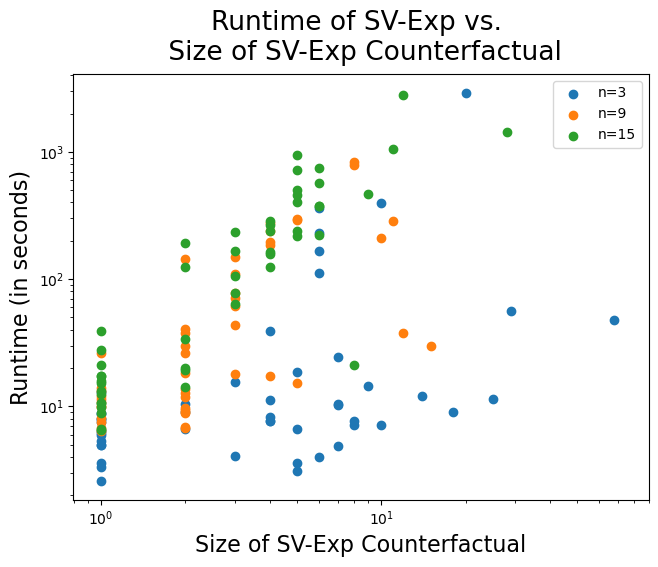

In [9]:
# Specify the folder where your CSV files are located
folder_path = "/Users/michellesi/Desktop/duke/research/shapley_stuff/slurm_runs"

# Get a list of all CSV files in the folder
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith("EX.csv")])
# csv_files = ['KDE_3_CANCER_EX.csv', 'KDE_6_CANCER_EX.csv', 'KDE_9_CANCER_EX.csv', 'KDE_12_CANCER_EX.csv', 'KDE_15_CANCER_EX.csv', 'LR_3_CANCER_EX.csv', 'LR_6_CANCER_EX.csv', 'LR_9_CANCER_EX.csv','LR_12_CANCER_EX.csv', 'LR_15_CANCER_EX.csv',]
# csv_files = ['KDE_3_CANCER_EX.csv', 'KDE_9_CANCER_EX.csv', 'KDE_15_CANCER_EX.csv']
csv_files = ['LR_3_CANCER_EX.csv', 'LR_9_CANCER_EX.csv', 'LR_15_CANCER_EX.csv']
dataframes = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    df.columns = ["ds_size","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_diff", "greedy_diff","num_owners", "data_dist", "size_dist", "util", "ds_name"]
    df.loc[df["MC_time"] == 0, "MC_time"] = 0.0001
    df["A_B_sizediff"] = df["A_size"] - df["B_size"]
    dataframes.append(df)

prepareData(dataframes, "greedy_answer")

In [10]:
summary_stats = process_csv_files(dataframes, ["Log_MC_time", "Log_greedy_time", "MC_accuracy", "greedy_accuracy","MC_answer", "greedy_answer"])
summary_stats_kde = summary_stats.head(5)
summary_stats_lr = summary_stats.tail(5).reset_index(drop=True)
summary_stats

,Log_MC_time_mean,Log_MC_time_std,Log_greedy_time_mean,Log_greedy_time_std,MC_accuracy_mean,MC_accuracy_std,greedy_accuracy_mean,greedy_accuracy_std,MC_answer_mean,MC_answer_std,greedy_answer_mean,greedy_answer_std,MC_accuracy,greedy_accuracy,num_owners,util,data_dist,size_dist,ds_name
0,4.280504,2.271258,2.581532,1.437155,0.367347,0.487078,0.877551,0.331201,1.918367,0.702280,7.020408,10.806036,36.734694,87.755102,3,log_reg,uniform,uniform,cancer
1,5.350009,2.272194,3.549361,1.402362,0.448980,0.502545,0.918367,0.276642,1.795918,0.499149,5.224490,13.312377,44.897959,91.836735,9,log_reg,uniform,uniform,cancer
2,4.557808,1.669071,4.514192,1.673783,0.285714,0.456435,0.918367,0.276642,1.653061,0.522455,4.061224,4.379917,28.571429,91.836735,15,log_reg,uniform,uniform,cancer


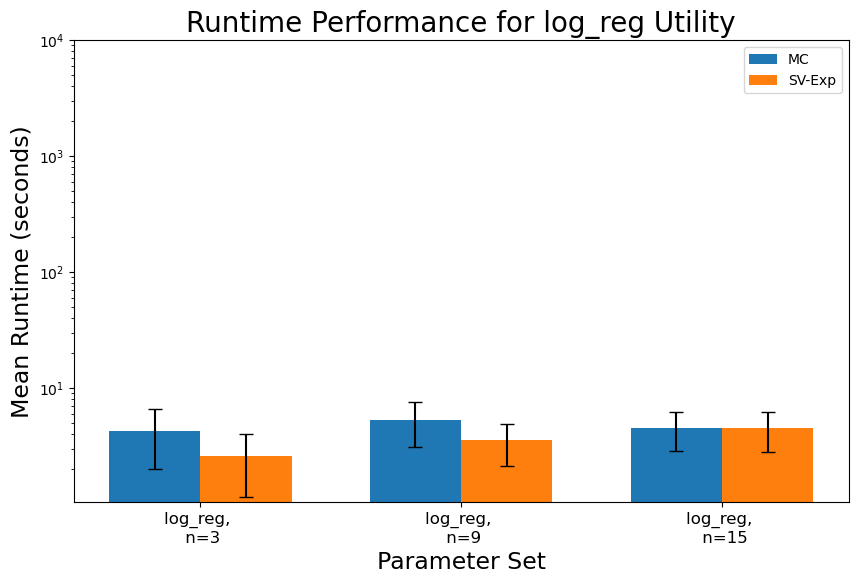

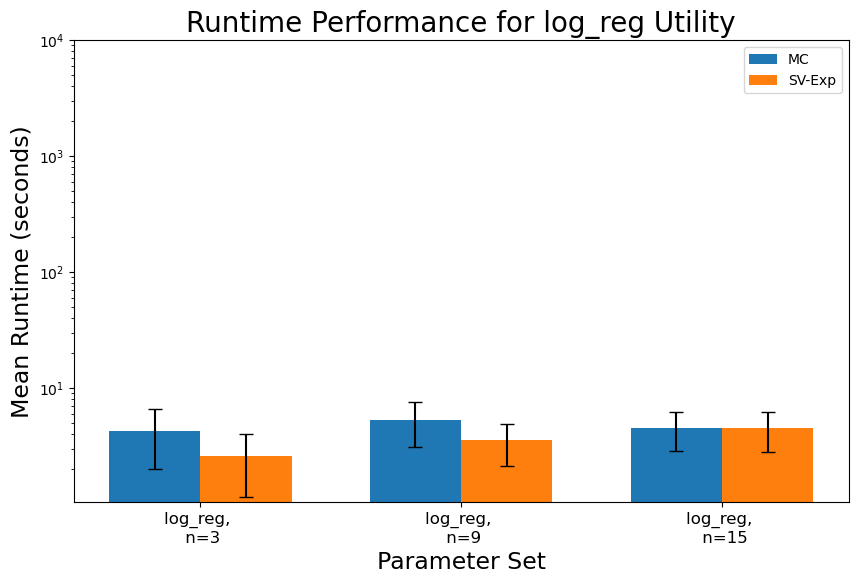

In [11]:
plot_runtimes(summary_stats_kde, 'Log_MC_time','Log_greedy_time')
plot_runtimes(summary_stats_lr, 'Log_MC_time','Log_greedy_time')

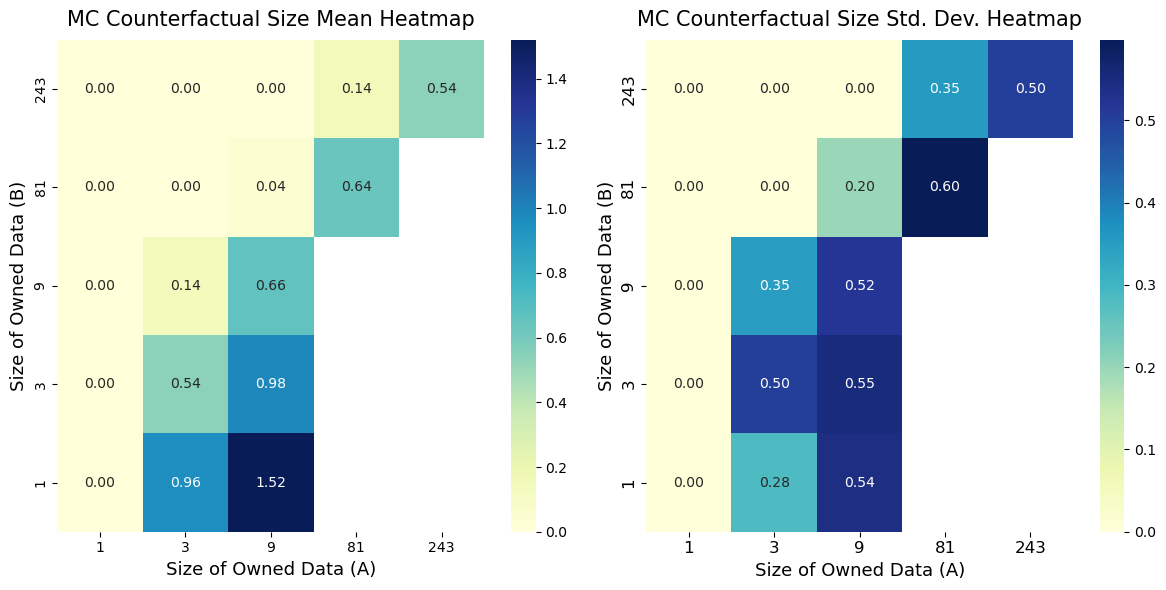

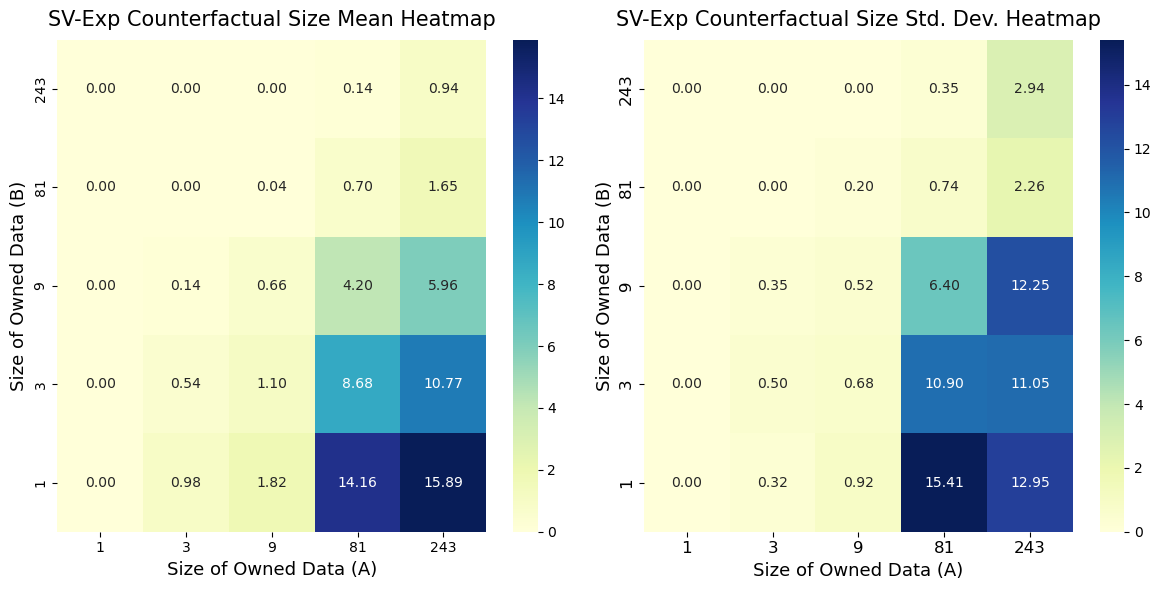

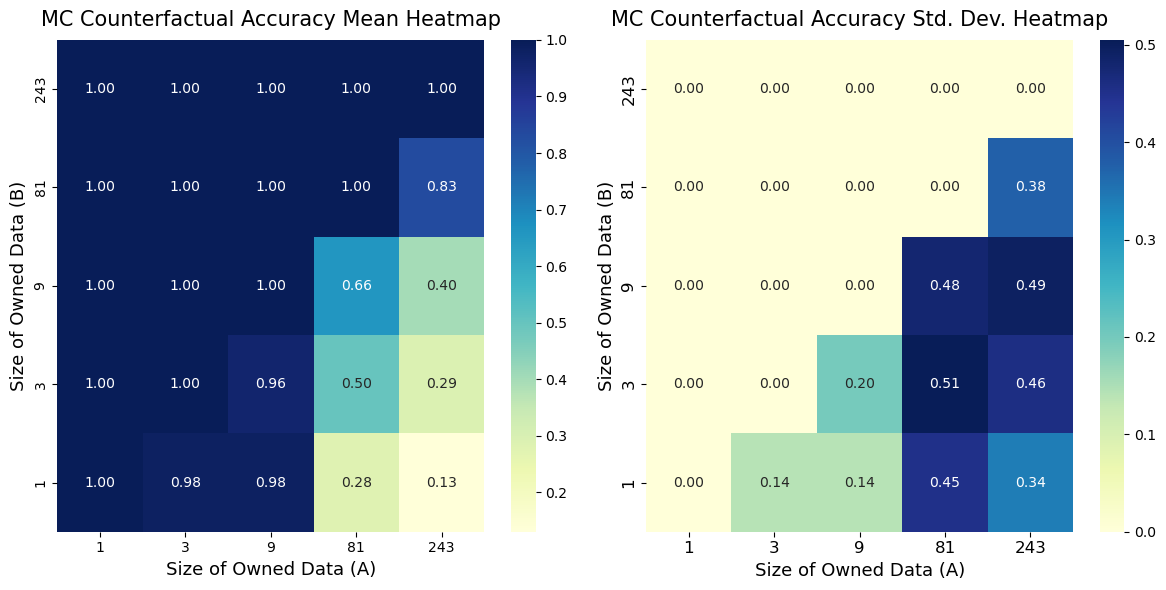

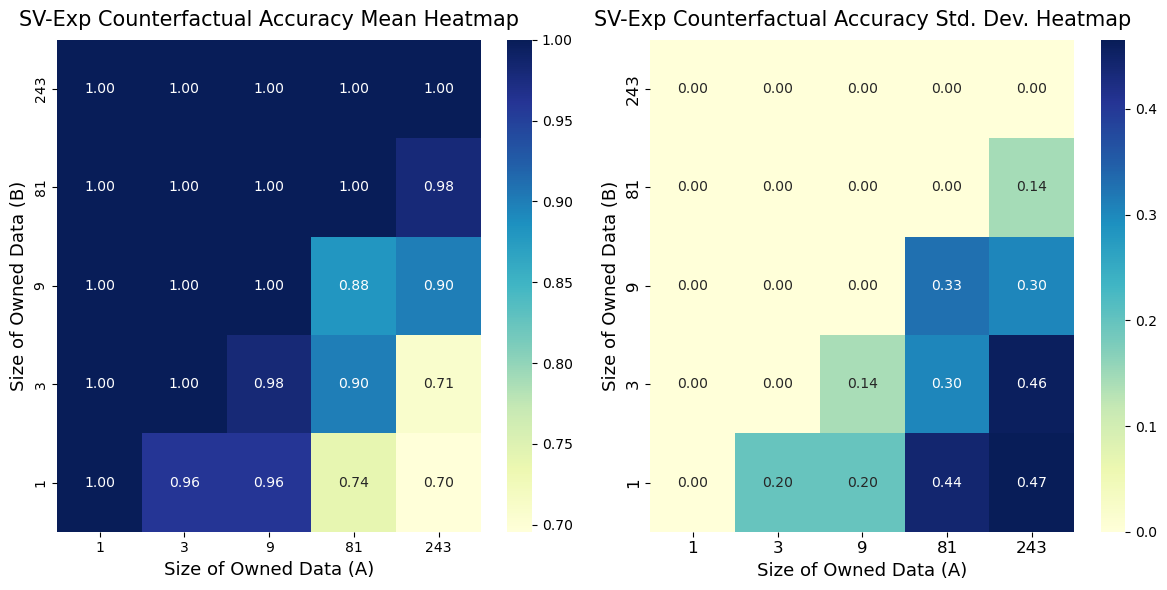

In [12]:
df_zipf = pd.read_csv('FIXED_ZIPFIAN_LR.csv')  # Replace 'your_data.csv' with the actual file path


# df.columns = ["A_index","B_index","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "num_owners", "data_dist", "size_dist", "util", "ds_name", "trial"]
df_zipf.columns = ["ds_size","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "num_owners", "data_dist", "size_dist", "util", "ds_name"]
df_zipf.loc[df_zipf['MC_final_difference'] == 1, 'MC_answer'] = np.nan
df_zipf.loc[df_zipf['MC_final_difference'] == 1, 'MC_time'] = np.nan
df_zipf.loc[df_zipf['greedy_final_difference'] == 1, 'greedy_answer'] = np.nan
df_zipf.loc[df_zipf['greedy_final_difference'] == 1, 'greedy_time'] = np.nan

makeTableZipf(df_zipf, "A_size", "B_size", ["MC_answer", "greedy_answer", "MC_accuracy", "greedy_accuracy"])

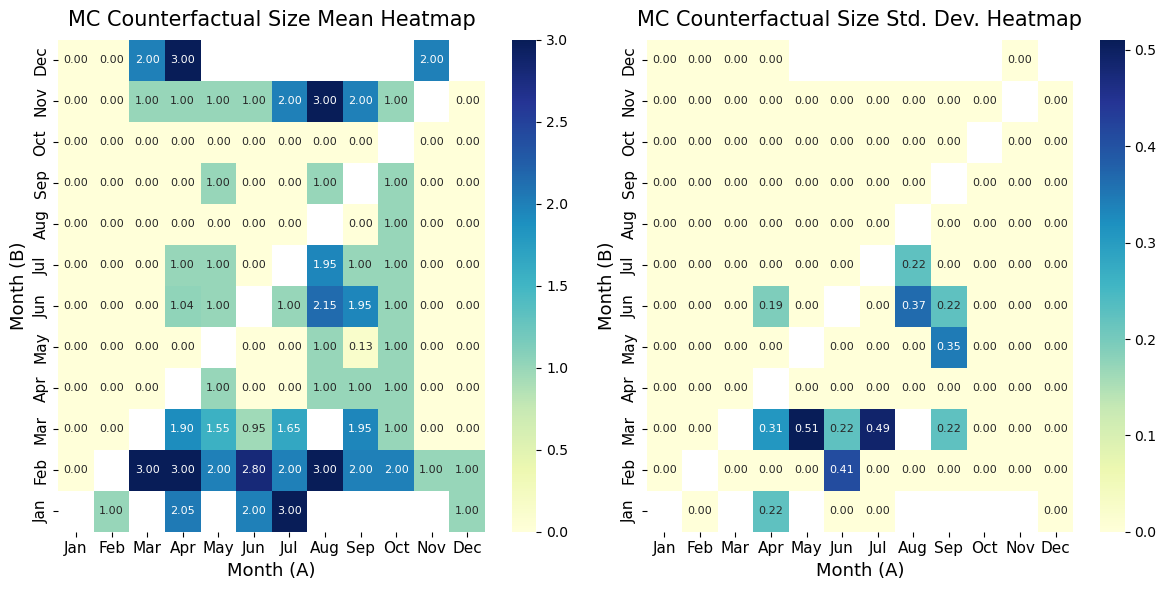

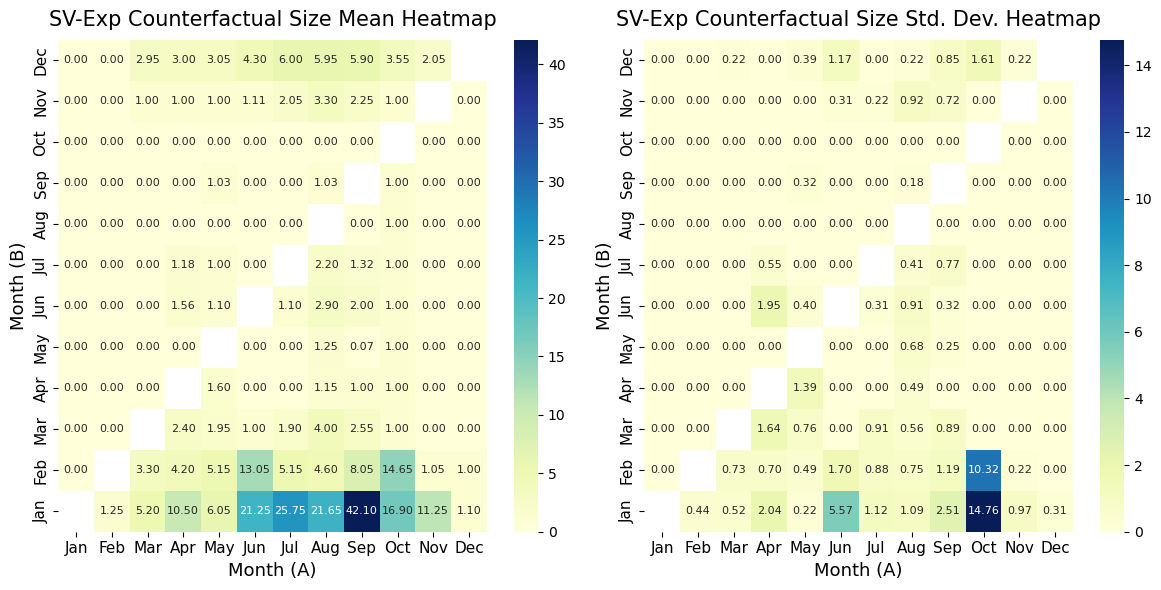

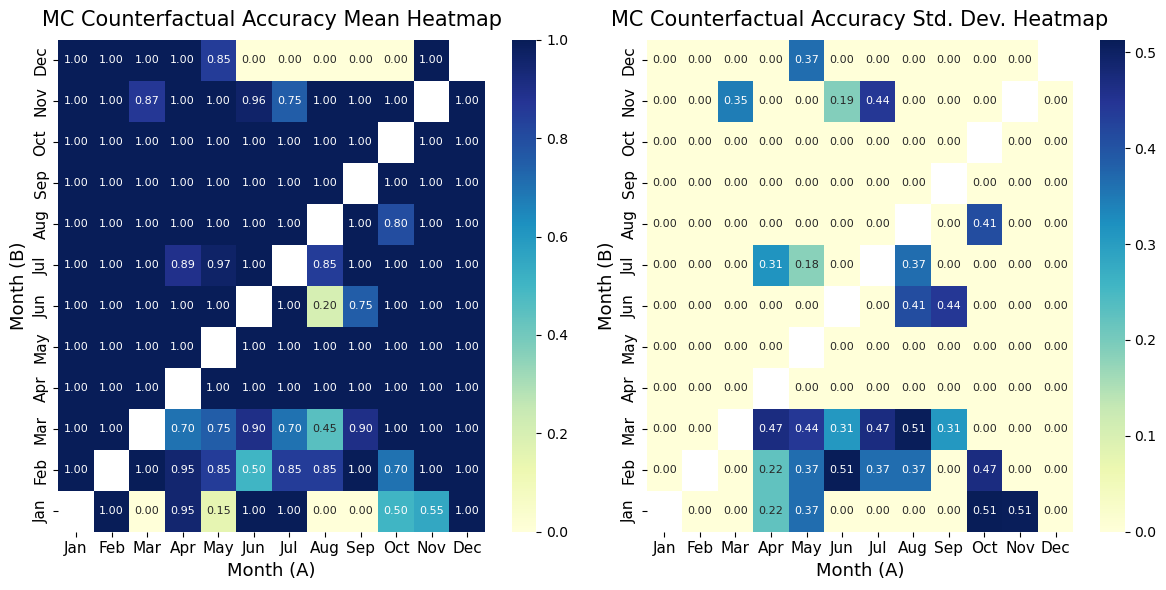

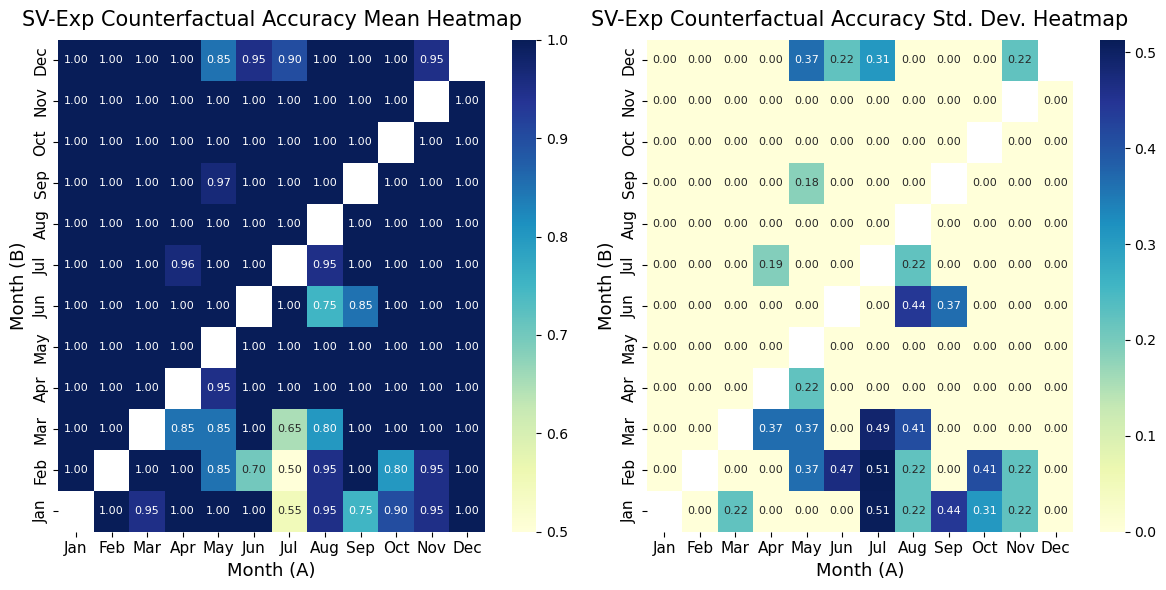

In [13]:
df_nat = pd.read_csv('NATURAL.csv')  # Replace 'your_data.csv' with the actual file path

df_nat.columns = ["A_index","B_index","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "num_owners", "data_dist", "size_dist", "util", "ds_name", "trial"]

df_nat.loc[df_nat['MC_final_difference'] == 1, 'MC_answer'] = np.nan
df_nat.loc[df_nat['MC_final_difference'] == 1, 'MC_time'] = np.nan
df_nat.loc[df_nat['greedy_final_difference'] == 1, 'greedy_answer'] = np.nan
df_nat.loc[df_nat['greedy_final_difference'] == 1, 'greedy_time'] = np.nan

makeTableNat(df_nat, "A_index", "B_index", ["MC_answer", "greedy_answer","MC_accuracy", "greedy_accuracy"])


117
105
73
65
61
59
37
79
25
82
45
52


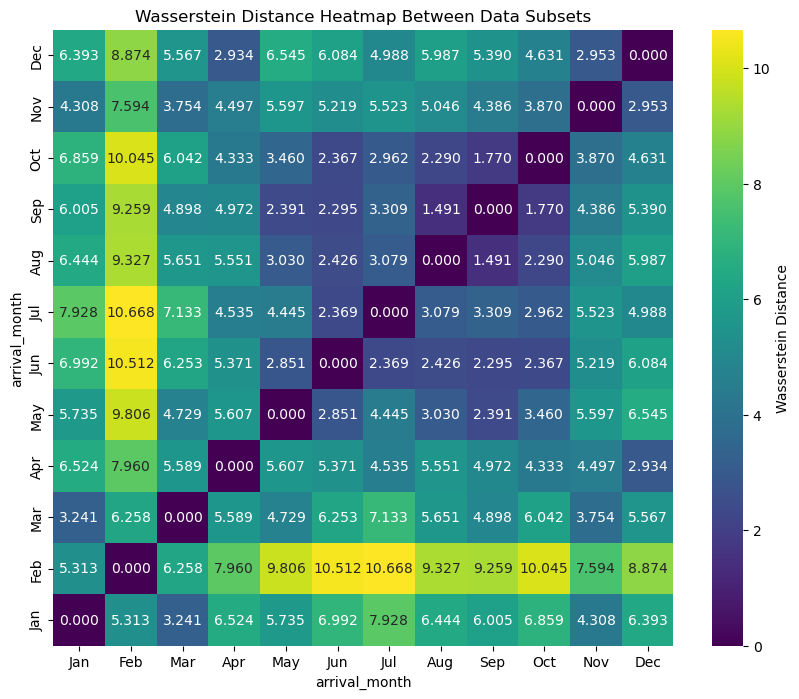

In [14]:
X_train_res = pd.read_csv("reservation_train.csv")
owners, categories = assignClusters(X_train_res, "arrival_month")
genWassDist(X_train_res, "arrival_month")